In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [81]:
df=pd.read_csv("c:/Users/dell/Downloads/100-days-of-machine-learning-main/day38-missing-indicator/train.csv",usecols=["Age","Fare","Survived"])

In [82]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [84]:
X=df.drop(labels="Survived",axis=1)
y=df["Survived"]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
X_train["Age_imputed"]=X_train["Age"]
X_test["Age_imputed"]=X_test["Age"]

In [88]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()][X_train['Age_imputed'].isnull()]

140   NaN
358   NaN
674   NaN
727   NaN
428   NaN
       ..
849   NaN
87    NaN
277   NaN
359   NaN
629   NaN
Name: Age_imputed, Length: 141, dtype: float64

In [89]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
X_test["Age_imputed"][X_test["Age_imputed"].isnull()]=X_test["Age"].dropna().sample(X_test["Age"].isnull().sum()).values

C:\Users\dell\AppData\Local\Temp\ipykernel_20912\943245907.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
C:\Us

In [90]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,48.0
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,38.0
559,36.0,17.4000,36.0


C:\Users\dell\AppData\Local\Temp\ipykernel_20912\3351185345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\dell\AppData\Local\Temp\ipykernel_20912\3351185345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

<Axes: xlabel='Age_imputed', ylabel='Density'>

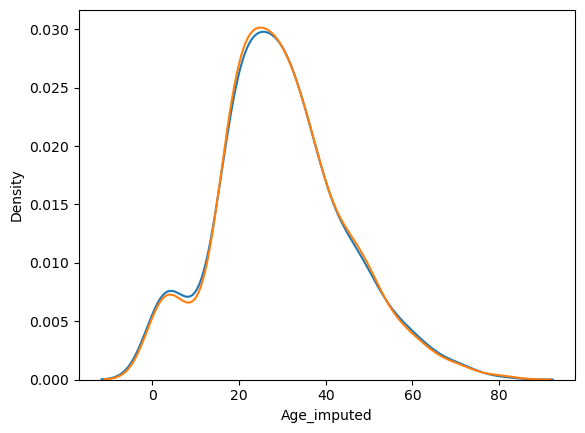

In [99]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


In [102]:
print(X_train["Age"].var())
print(X_train["Age_imputed"].var())

213.7165085187578
210.22341485168863


In [103]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,68.496754
Age,79.072379,213.716509,213.716509
Age_imputed,68.496754,213.716509,210.223415


<Axes: ylabel='Age'>

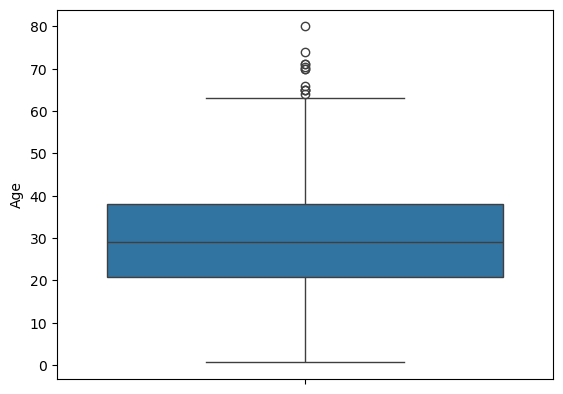

In [111]:
sns.boxplot(y="Age",data=X_train)

<Axes: >

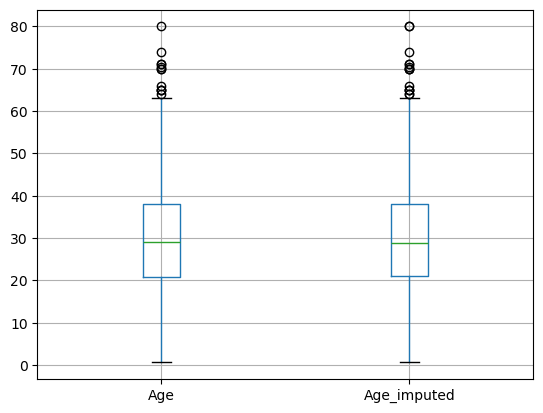

In [113]:
X_train[["Age","Age_imputed"]].boxplot()